# i .Perkenalan


=================================================

Pothole image detection using deep learning method

Nama  : Muhammad Iqbal  

Latar belakang :

Problem :
Kondisi infrastruktur jalan di Indonesia kebanyakan saat ini jalan rusak atau berlubang. Tidak jarang kendaraan yg melewati jalan dengan kondisi ini akhirnya terhambat dan jika pengguna kendaraan tidak hati-hati dapat berpengaruh buruk ke kondisi kendaraan.

Objective:  
Program yang akan dibuat kali ini, akan mendeteksi jalan berlubang pada gambar yg diberikan menggunakan metode CNN. Hasil prediksi akan mendeteksi jalan yg berlubang yg bisa meningkatkan keamanan berkendara di jalan. Model dapat digunakan pada program AI kendaraan autonomous untuk memberikan informasi kondisi jalan saat berkendara.

User/pengguna : Developer program pada kendaraan autonomous, pengguna kendaraan mobil

Note: Keseluruhan proses pengerjaan pada projek kali ini dikerjakan lewat google colabs dengan runtime GPU.

=================================================


# ii. Import libraries


Sebelum melakukan data loading, akan dilakukan import libraries yg dibutuhkan pada keseluruhan projek kali ini.     

In [1]:
# Downgrade versi TensorFlow and tf-keras
!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.1 which is incompatible.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.1 which is incompatible.


In [1]:
# Import Libraries

import os
import random
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check TensorFlow version
print(tf.__version__)

2.15.1


# iii. Data loading

Pada projek kali ini, dataset yg digunakan adalah dataset dari kaggle. Dataset merupakan dataset pothole detection dan merupakan open-source data yg telah disesuaikan untuk keperluan model machine learning. Pertama akan melakukan loading data.

In [2]:
#Kaggle API mounting from google drive

drive.mount('/content/drive')
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [3]:
%%time
# Download Dataset
# Source dataset : https://www.kaggle.com/datasets/atulyakumar98/pothole-detection-dataset


!kaggle datasets download atulyakumar98/pothole-detection-dataset
!mkdir -p dataset
!cp pothole-detection-dataset.zip /content/dataset/
!unzip /content/dataset/pothole-detection-dataset.zip -d /content/dataset

Dataset URL: https://www.kaggle.com/datasets/atulyakumar98/pothole-detection-dataset
License(s): CC0-1.0
 90% 175M/194M [00:00<00:00, 315MB/s]
100% 194M/194M [00:00<00:00, 298MB/s]
Archive:  /content/dataset/pothole-detection-dataset.zip
  inflating: /content/dataset/normal/1.jpg  
  inflating: /content/dataset/normal/10.jpg  
  inflating: /content/dataset/normal/100.jpg  
  inflating: /content/dataset/normal/101.jpg  
  inflating: /content/dataset/normal/102.jpg  
  inflating: /content/dataset/normal/103.jpg  
  inflating: /content/dataset/normal/104.jpg  
  inflating: /content/dataset/normal/105.jpg  
  inflating: /content/dataset/normal/106.jpg  
  inflating: /content/dataset/normal/107.jpg  
  inflating: /content/dataset/normal/108.jpg  
  inflating: /content/dataset/normal/109.jpg  
  inflating: /content/dataset/normal/11.jpg  
  inflating: /content/dataset/normal/110.jpg  
  inflating: /content/dataset/normal/111.jpg  
  inflating: /content/dataset/normal/112.jpg  
  inflating: /

Data loading berhasil dilakukan. Selanjutnya generate data menggunakan imageData generator untuk melakukan beberapa eksplorasi data.

In [4]:
# Takes the path to a directory & generates batches of augmented data from a directory

IMG_SIZE = 500
path = '/content/dataset'

datagen = ImageDataGenerator()
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary', shuffle=False) # `class_mode=binary` for binary classification

Found 681 images belonging to 2 classes.


In [5]:
#Show data variable type

data

In [6]:
# Show images in pixel form

print('Images : ', data[0][0])
print('Shape  : ', data[0][0].shape)

Images :  [[[[231. 246. 255.]
   [231. 246. 255.]
   [199. 217. 239.]
   ...
   [210. 220. 221.]
   [239. 248. 247.]
   [239. 248. 247.]]

  [[231. 246. 255.]
   [231. 246. 255.]
   [199. 217. 239.]
   ...
   [210. 220. 221.]
   [239. 248. 247.]
   [239. 248. 247.]]

  [[231. 246. 255.]
   [231. 246. 255.]
   [199. 217. 239.]
   ...
   [210. 220. 221.]
   [239. 248. 247.]
   [239. 248. 247.]]

  ...

  [[252. 255. 255.]
   [252. 255. 255.]
   [219. 222. 227.]
   ...
   [218. 213. 207.]
   [255. 254. 248.]
   [255. 254. 248.]]

  [[252. 255. 255.]
   [252. 255. 255.]
   [219. 222. 227.]
   ...
   [218. 213. 207.]
   [255. 254. 248.]
   [255. 254. 248.]]

  [[252. 255. 255.]
   [252. 255. 255.]
   [219. 222. 227.]
   ...
   [218. 213. 207.]
   [255. 254. 248.]
   [255. 254. 248.]]]


 [[[ 36.  36.  36.]
   [ 17.  17.  17.]
   [ 18.  18.  18.]
   ...
   [ 80.  80.  80.]
   [ 66.  66.  66.]
   [142. 142. 142.]]

  [[ 36.  36.  36.]
   [ 17.  17.  17.]
   [ 18.  18.  18.]
   ...
   [ 80.  8

In [7]:
# Show classes

print('Class 0 (normal)  : ', data[0][1])
print('Class 1 (potholes)  : ', data[11][1])
print('Shape  : ', data[0][1].shape)

Class 0 (normal)  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class 1 (potholes)  :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Shape  :  (32,)


In [8]:
# Show pixel of first image

print('Pixel : \n', data[0][0][0])
print('Shape : ', data[0][0][0].shape)

Pixel : 
 [[[231. 246. 255.]
  [231. 246. 255.]
  [199. 217. 239.]
  ...
  [210. 220. 221.]
  [239. 248. 247.]
  [239. 248. 247.]]

 [[231. 246. 255.]
  [231. 246. 255.]
  [199. 217. 239.]
  ...
  [210. 220. 221.]
  [239. 248. 247.]
  [239. 248. 247.]]

 [[231. 246. 255.]
  [231. 246. 255.]
  [199. 217. 239.]
  ...
  [210. 220. 221.]
  [239. 248. 247.]
  [239. 248. 247.]]

 ...

 [[252. 255. 255.]
  [252. 255. 255.]
  [219. 222. 227.]
  ...
  [218. 213. 207.]
  [255. 254. 248.]
  [255. 254. 248.]]

 [[252. 255. 255.]
  [252. 255. 255.]
  [219. 222. 227.]
  ...
  [218. 213. 207.]
  [255. 254. 248.]
  [255. 254. 248.]]

 [[252. 255. 255.]
  [252. 255. 255.]
  [219. 222. 227.]
  ...
  [218. 213. 207.]
  [255. 254. 248.]
  [255. 254. 248.]]]
Shape :  (500, 500, 3)


In [9]:
# Index of category

data.class_indices

{'normal': 0, 'potholes': 1}

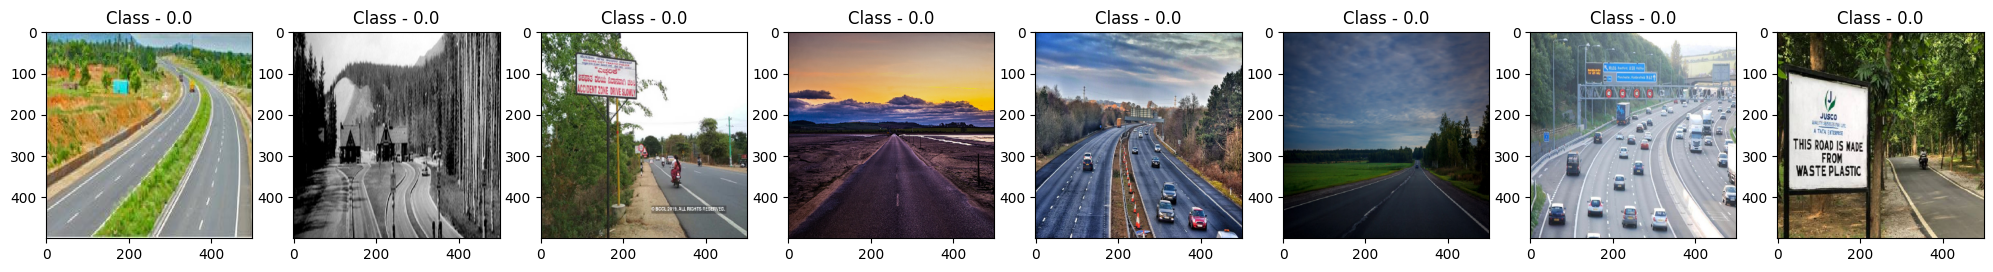

In [10]:
# Show image from class 0 (normal road)

fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(25,8))
n = 0

for j in range(8):
  img = data[0][0][n].astype('uint8')
  ax[j].imshow(img)
  ax[j].set_title('Class - ' + str(data[0][1][n]))
  n += 1

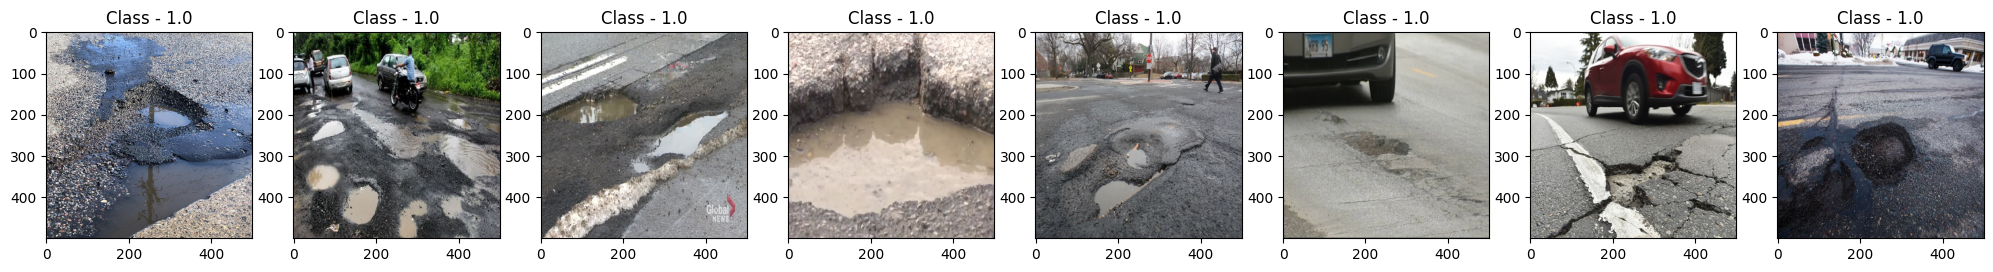

In [11]:
# Show image from class 1 (potholes road)

fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(25,8))
n = 0

for j in range(8):
  img = data[11][0][n].astype('uint8')
  ax[j].imshow(img)
  ax[j].set_title('Class - ' + str(data[11][1][n]))
  n += 1

Terlihat berhasil dilakukan data loading dengan beberapa kelas gambar. Selanjutnya lanjut mencari insight pada dataset dengan melakukan EDA.

# iv. Exploratory data analysis (EDA)

Pada bagian ini akan dilakukan EDA untuk mencari insight dan key pattern yg terdapat pada data.

## 1. Cek struktur data

Memastikan data sudah ter-load dengan benar

In [12]:
#Cek directory dataset
dataset_path = "/content/dataset/"
classes = os.listdir(dataset_path)

for class_name in classes:
  if class_name != "pothole-detection-dataset.zip":
    class_path = os.path.join(dataset_path, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class '{class_name}': {num_images} images")


Class 'potholes': 329 images
Class 'normal': 352 images


Terlihat data sudah ter load dengan benar dan dataset memiliki data yg cukup balance.

## 2. Menampilkan sample gambar

## 2.1 Menampilkan gambar mode RGB

Menampilkan beberapa gambar dari dataset dalam RGB

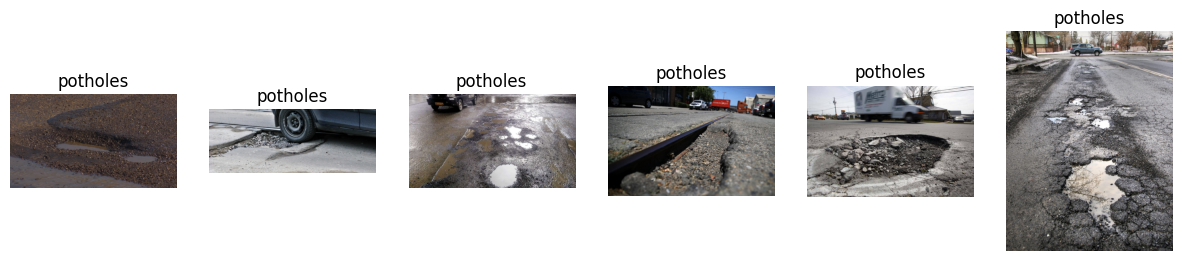

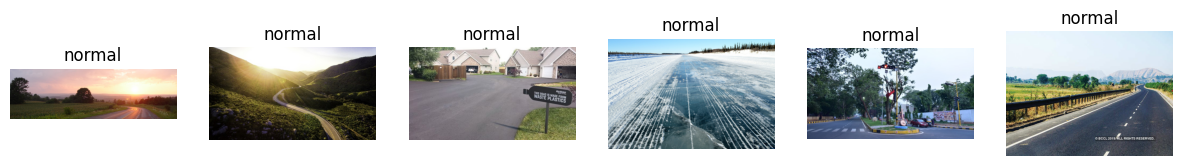

In [13]:
#Function for show sample image in RGB
def show_images(class_name, dataset_path, num_images=6, mode='RGB'):
    class_path = os.path.join(dataset_path, class_name)
    random.seed(88)
    images = random.sample(os.listdir(class_path), num_images)

    #Plot to show image
    fig, axes = plt.subplots(1, num_images, figsize=(15,8))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)  # Read image
        img = img.convert(mode)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(class_name)

    plt.show()

# Show samples from both classes in RGB
for class_name in classes:
  if class_name != "pothole-detection-dataset.zip":
    show_images(class_name, dataset_path)


## 2.2 Menampilkan gambar mode CMYK

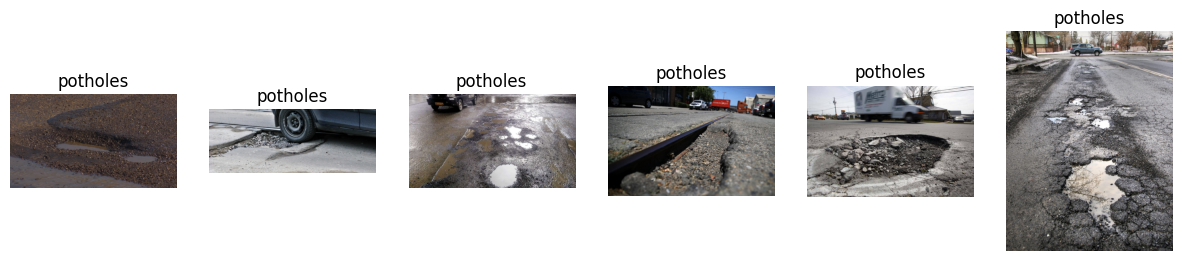

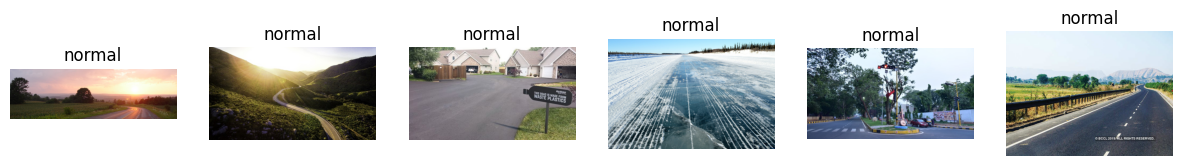

In [14]:
# Show samples from both classes in CMYK
for class_name in classes:
  if class_name != "pothole-detection-dataset.zip":
    show_images(class_name, dataset_path, mode='CMYK')

## 2.3 Menampilkan gambar mode grayscale

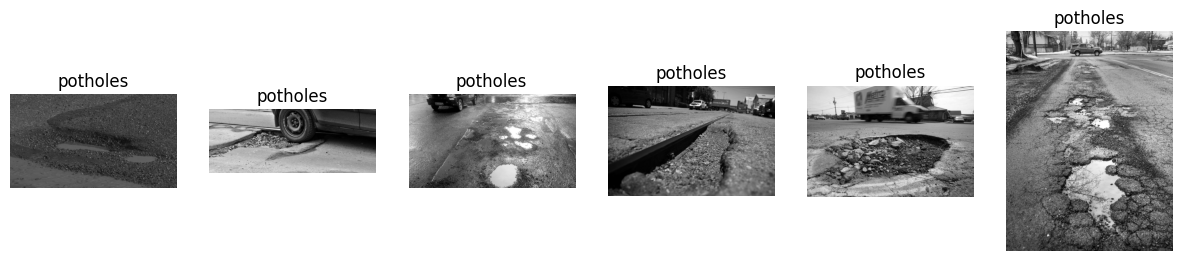

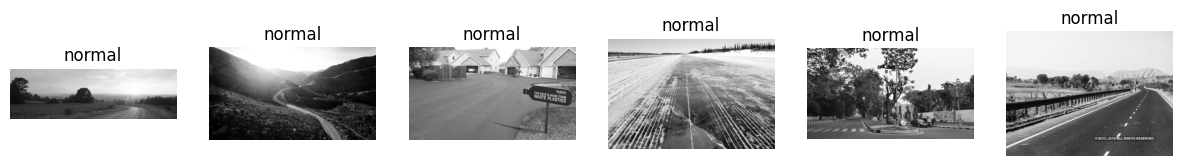

In [15]:
# Show samples from both classes in grayscale
for class_name in classes:
  if class_name != "pothole-detection-dataset.zip":
    show_images(class_name, dataset_path, mode='I')

Diketahui pada dataset, Gambar pothole terlihat memiliki variasi dengan pengambilan gambar yg berbeda-beda. Gambar jalan berlubang terlihat kasar dan tidak beraturan, terkadang ada bayangan dan genangan air. Sedangkan gambar jalan normal terlihat memiliki beragam angle dan jenis. Gambar jalan normal memiliki permukaan yg halus dan konsisten. Saat model training nanti dengan model CNN, CNN harus mempelajari fitur berbasis tekstur (kasar vs halus) dan pola tepi (tidak beraturan vs konsisten). Selain itu, data augemntasi (flip, rotate, brightness adjusment) untuk menangani sudut dan pencahayaan yang berbeda. Gambar pada dataset rata-rata merupakan gambar yang diambil pada jalan raya beraspal. Dari pengamatan saya, gambar yg di ubah kedalam mode RGB terlihat memiliki identifikasi yg cukup dalam model training nya.

## 3. Cek dimensi gambar dan color channel

Melihat dimensi gambar.

In [16]:
#List for storing image path
image_shapes = []

#Open sample image and then convert it to matrix
for class_name in classes:
  if class_name != "pothole-detection-dataset.zip":
    class_path = os.path.join(dataset_path, class_name)
    img_name = os.listdir(class_path)[0]  # Pick one sample
    img_path = os.path.join(class_path, img_name)

    img = np.array(Image.open(img_path))
    image_shapes.append(img.shape)

print("Unique image shapes:", set(image_shapes))


Unique image shapes: {(660, 1060, 3), (409, 615, 3)}


Diketahui gambar memiliki dimensi yg berbeda-beda dan gambar memiliki RGB channel. Saat Model training, saya pakai feature resizing image ke (224,224,3).

## 4. Cek distribusi class

Cek distribusi kelas pada dataset

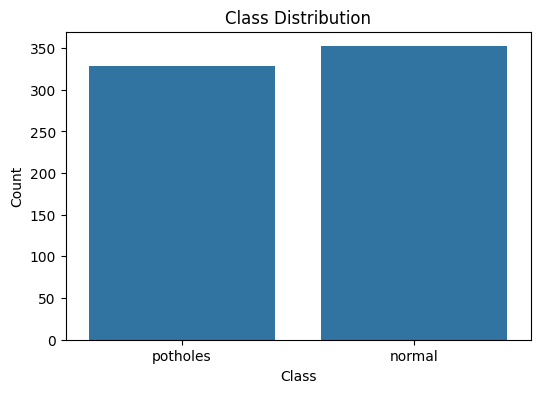

In [17]:
#Make dataframe distribution class
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes if class_name != "pothole-detection-dataset.zip"}
df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])

#Make distribution using barchart
plt.figure(figsize=(6,4))
sns.barplot(x="Class", y="Count", data=df)
plt.title("Class Distribution")
plt.show()

Diketahui distribusi kelas cukup balance di kedua kategori.

# v. Feature Engineering

Feature engineering untuk mempersiapkan dataset saat model training berjalan optimal dan mendapatkan hasil yg diharapkan. Proses yg akan dilakukan pada bagian ini adalah preprocessing pembagian data menjadi train-val-test dan preprocessing data (resizing, scaling, data augmentation).

## Split dataset into new folder

In [18]:
# Set paths
dataset_path = "/content/dataset"
output_path = "/content/split_dataset"

# Split ratios
train_ratio = 0.85
test_ratio = 0.15

# Create output directories
for split in ["train", "test"]:
    for class_name in os.listdir(dataset_path):
        os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

# Split data with random seed for consistency in each runs
random.seed(89)

# Split images
for class_name in os.listdir(dataset_path):
    if class_name != "pothole-detection-dataset.zip":
        class_path = os.path.join(dataset_path, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)

        train_idx = int(len(images) * train_ratio)

        for i, img_name in enumerate(images):
            src_path = os.path.join(class_path, img_name)

            if i < train_idx:
                dst_path = os.path.join(output_path, "train", class_name, img_name)
            else:
                dst_path = os.path.join(output_path, "test", class_name, img_name)

            # Copy the image to the new folder
            shutil.copy(src_path, dst_path)


## Split dataset to train-val-test

In [19]:
# Set image size and batch size
img_height = 224
img_width = 224
batch_size = 64

# Set path to the split dataset
train_path = "/content/split_dataset/train"
test_path = "/content/split_dataset/test"

# Remove pothole-detection-dataset.zip
shutil.rmtree("/content/split_dataset/train/pothole-detection-dataset.zip/", ignore_errors=True)
shutil.rmtree("/content/split_dataset/test/pothole-detection-dataset.zip/", ignore_errors=True)

# Create batch generator for train-set and val-set with data augmentation
train_datagen = ImageDataGenerator(rotation_range=20,
														width_shift_range=0.1,
														height_shift_range=0.1,
														zoom_range=0.1,
														horizontal_flip=True,
		 												rescale=1./255,
                            validation_split=0.25)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
																							class_mode='binary',
																							subset='training',
																							batch_size=batch_size,
																							shuffle=True,
																							seed=88)

val_set = train_datagen.flow_from_directory(train_path,
                                            target_size=(img_height,img_width),
																						class_mode='binary',
																						subset='validation',
																						batch_size=batch_size,
																						shuffle=True,
																						seed=88)

# Create batch generator for test-set
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
																						batch_size=batch_size,
																						shuffle=False,
																						seed=88)

Found 435 images belonging to 2 classes.
Found 143 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [20]:
#Show labels
print(train_set.class_indices)
print(val_set.class_indices)
print(test_set.class_indices)

{'normal': 0, 'potholes': 1}
{'normal': 0, 'potholes': 1}
{'normal': 0, 'potholes': 1}


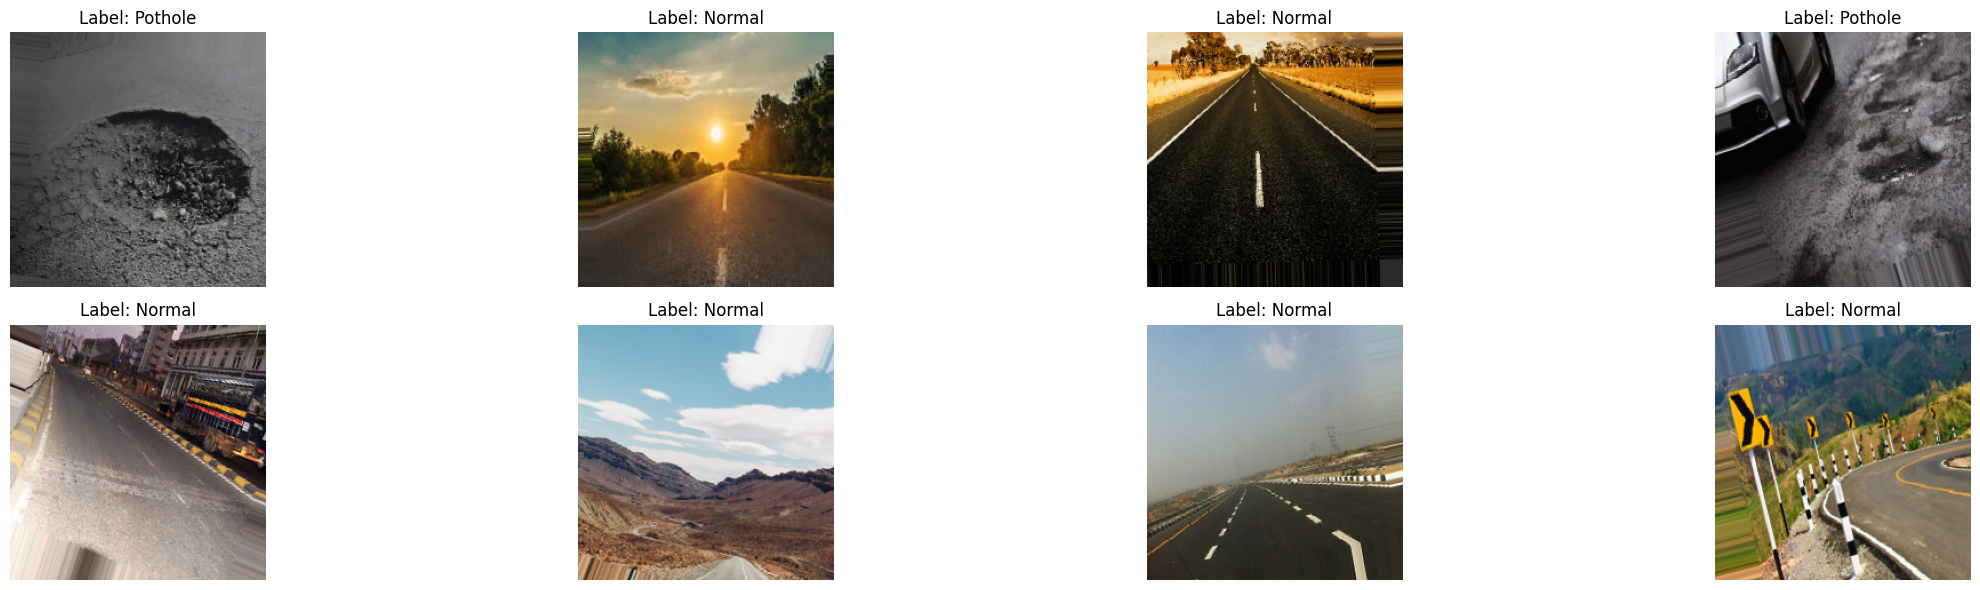

In [21]:
# Show sample images of train-set

# Get images and labels train-set
images, labels = next(train_set)

# Show first 8 images
plt.figure(figsize=(25, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {'Pothole' if labels[i]==1 else 'Normal'}")
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

# vi. ANN Training (Sequential API/Functional API)

# vi.1. Model Definition

Pada bagian ini akan dilakukan model definisi model menggunakan CNN . Disini saya akan buat 5 hidden layer pakai Sequential API karena simple dan output yg dihasilkan satu layer.

In [22]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [23]:
# Create Sequential API model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

Penjelasan bagian dan hyperparamter:
- `Conv2D(32, (3, 3))` => Hidden layer pada CNN dengan aplikasi 32 filter dan dimensi 3x3
- `activation='relu'` => Activation relu membantu model belajar lebih cepat dengan metode non-linear dan output positive
- `MaxPooling2D(2, 2)` => Mengurangi features map berjumlah 2, dipakai biar mengurangi overfitting dan secara komputasional model lebih cepat
- `Flatten()` => Konversi 3D ke 1D, dipakai sebelum masuk ke dense layer
- `Dropout(0.5)` => Mengurangi jumlah neuron secara acak sebanyak 50%, dipakai agar meminimalisir overfitting
- `Dense(1, activation='sigmoid')` => Output layer dengan activation sigmoid untuk binary classification

- `loss='binary_crossentropy'` => Dipakai untuk binary classification
- `optimizer='adam'` => Dipakai karena optimizer efisien dan adaptive
- `metrics=['accuracy']` => Mencari prediksi akurat



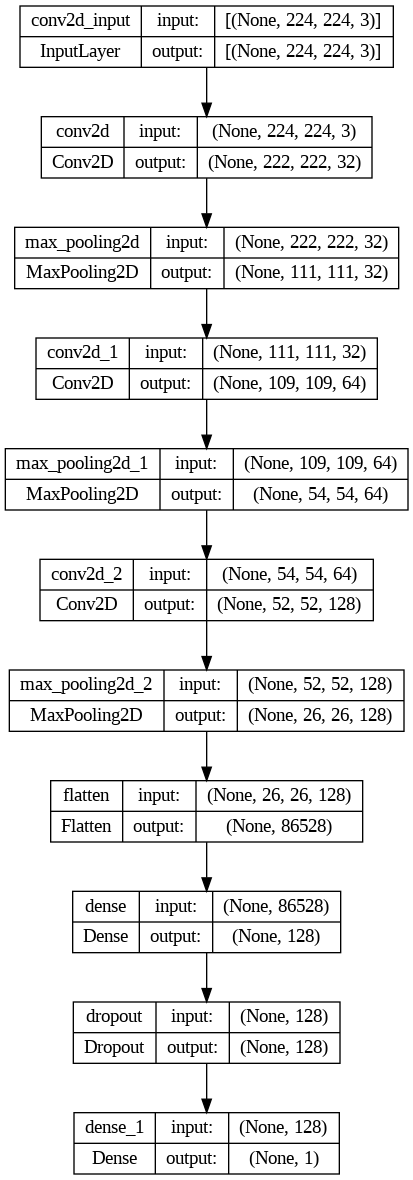

In [24]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

# vi.2 Model training

In [25]:
# Define steps_per_epoch dan validation_steps
steps_per_epoch = train_set.samples // train_set.batch_size
validation_steps = val_set.samples // val_set.batch_size

In [26]:
%%time

# Train the model

epoch = 20
history = model.fit(train_set, epochs=epoch, steps_per_epoch=steps_per_epoch, validation_data=val_set, verbose=1, validation_steps=validation_steps)

Epoch 1/20
6/6 [==============================] - 17s 3s/step - loss: 1.4066 - accuracy: 0.5283 - val_loss: 0.7566 - val_accuracy: 0.5312
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 0.7060 - accuracy: 0.5391 - val_loss: 0.6494 - val_accuracy: 0.5391
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 0.6820 - accuracy: 0.5957 - val_loss: 0.6245 - val_accuracy: 0.8516
Epoch 4/20
6/6 [==============================] - 13s 2s/step - loss: 0.5975 - accuracy: 0.7062 - val_loss: 0.5186 - val_accuracy: 0.8359
Epoch 5/20
6/6 [==============================] - 14s 2s/step - loss: 0.4184 - accuracy: 0.8571 - val_loss: 0.3686 - val_accuracy: 0.8281
Epoch 6/20
6/6 [==============================] - 14s 2s/step - loss: 0.4724 - accuracy: 0.7790 - val_loss: 0.4218 - val_accuracy: 0.8047
Epoch 7/20
6/6 [==============================] - 14s 2s/step - loss: 0.4301 - accuracy: 0.8086 - val_loss: 0.4593 - val_accuracy: 0.8438
Epoch 8/20
6/6 [==================

# vi.3 Model evaluation

2/2 [==============================] - 1s 461ms/step
              precision    recall  f1-score   support

      normal       0.94      0.85      0.89        53
    potholes       0.85      0.94      0.90        50

    accuracy                           0.89       103
   macro avg       0.90      0.89      0.89       103
weighted avg       0.90      0.89      0.89       103



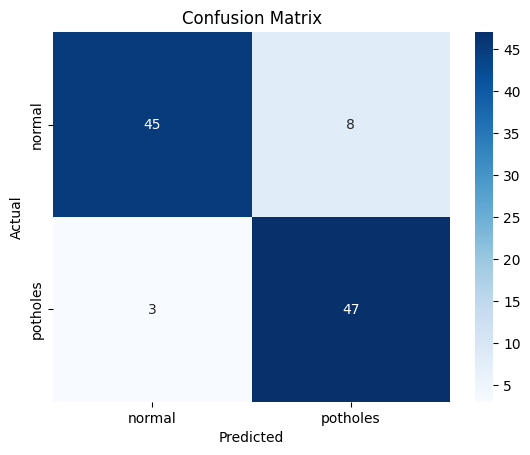

In [27]:
# Get predicted probabilities
pred_probs = model.predict(test_set)
# Convert to class labels
pred_labels = (pred_probs > 0.5).astype(int).reshape(-1)

true_labels = test_set.classes

# Classification report
print(classification_report(true_labels, pred_labels, target_names=test_set.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Dari hasil, terlihat nilai akurasi yg bagus di angka 0.85+. Model berhasil memprediksi gambar jalan berlubang dan jalan normal dengan baik. Selain itu, confusion matrix menunjukkan bahwa model dapat memprediksi mana gambar yg benar dan kesalahan tertinggi nya hanya di prediksi gambar jalan normal hanya di angka tidak lebih dari 10.


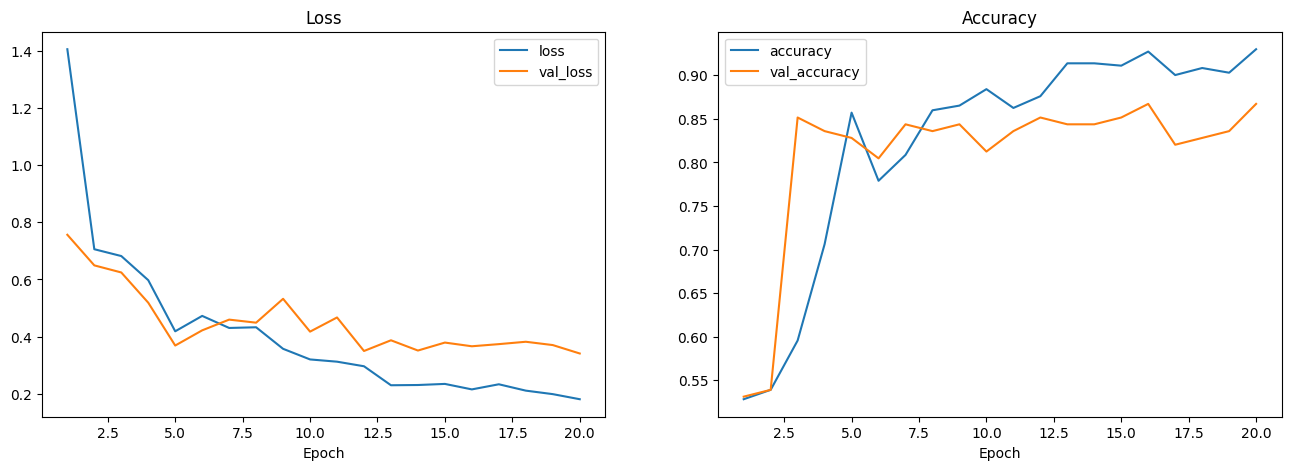

In [28]:
# Plot training results

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1, epoch+1), history.history['loss'], label='loss')
ax[0].plot(range(1, epoch+1), history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1, epoch+1), history.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch+1), history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

Dari hasil plot loss train-val menunjukkan adanya kecenderungan model overfitting ditunjukkan dari pergerakan loss training yg turun temurun, tetapi loss validation bergerak fluktuatif dan kadang meningkat seiring iterasi. Dari plot accuracy menunjukkan tanda overfitting, dari training model berhasil belajar dari data dengan baik pergerakan seiring iterasi meningkat, tetapi accuracy pada validation meningkat di awal lalu hasil menjadi fluktuatif. Selanjutnya akan dicoba training ulang untuk meningkatkan hasil model.


# vii. ANN Improvement Training (Sequential API/Functional API)

# vii.1 Model definition

Pada bagian improvement training, disini saya akan menggunakan transfer learning sebagai basis model kali ini. Transfer learning adalah teknik di mana model yang dilatih pada suatu dataset diadaptasi dan diterapkan untuk dataset yang berbeda namun terkait. Pada kasus ini, dataset akan mengambil informasi dari dataset yg telah di training .Dengan transfer learning diharapkan hasil yg didapatkan lebih baik ketimbang sebelumnya. Saya pakai model VGG16 dan MobileNetV2

In [29]:
#Model list
models = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
}

# Function to build model
def build_model(base_model):
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


9406464/9406464 [==============================] - 0s 0us/step


Penjelasan bagian dan hyperparamter:
- `GlobalAveragePooling2D()` => Membagi rata-rata setiap feature map menjadi satu value, dipakai untuk mempercepat proses training
- `activation='relu'` => Activation relu membantu model belajar lebih cepat dengan metode non-linear dan output positive
- `Dropout(0.3)` => Mengurangi jumlah neuron secara acak sebanyak 30%, dipakai agar meminimalisir overfitting
- `Dense(1, activation='sigmoid')` => Output layer dengan activation sigmoid untuk binary classification

- `loss='binary_crossentropy'` => Dipakai untuk binary classification
- `optimizer='adam'` => Dipakai karena optimizer efisien dan adaptive
- `metrics=['accuracy']` => Mencari prediksi akurat

Kenapa VGG16 dan MobileNetV2 dipilih sebagai model pre-trained:     
- `VGG16` :   
- Performa yg terbukti : VGG16 merupakan arsitektur CNN lawas yg sudah terbukti bekerja efisien di image classification tasks. (ImageNet benchmark, Simonyan & Zisserman, 2014)
- Deep but simple : VGG16 mempunyai struktur yg sederhana dan seragam (3x3 convolution dan 2x2 pooling) — dimana hal ini membuatnya bagus untuk feature extraction tanpa tuning yg kompleks.
- Kuat di penangkapan tekstur : Gambar jalan berlubang biasanya memiliki tekstur yg kasar dan pola yg acak — Mapping Deep feature VGG16 menangkap tekstur dengan sangat baik.
- Reference:
Simonyan, K., & Zisserman, A. (2014). Very Deep Convolutional Networks for Large-Scale Image Recognition — [arXiv:1409.1556](https://arxiv.org/abs/1409.1556)

- `MobileNetV2` :
- Ringan dan efisien: MobileNetV2 dirancang untuk mobile dan edge devices → artinya model ini cepat dan kecil — sangat cocok untuk deployment ke aplikasi web seperti Hugging Face.
- Generalization yang bagus: Menggunakan depthwise separable convolutions dan struktur inverted residual sehingga bisa beradaptasi dengan baik ke data baru (sangat penting kalau dataset jalan berlubangmu tidak terlalu besar).
- Akurasi tinggi dengan komputasi rendah: Seimbang antara akurasi dan kecepatan → cocok untuk kebutuhan real-world.
- Referensi:
Sandler, M., Howard, A., Zhu, M., Zhmoginov, A., & Chen, L. C. (2018). MobileNetV2: Inverted Residuals and Linear Bottlenecks — [arXiv:1801.04381](https://arxiv.org/abs/1801.04381)



# vii.2 Model training


Training VGG16...
Epoch 1/20
6/6 [==============================] - 28s 5s/step - loss: 0.7295 - accuracy: 0.5472 - val_loss: 0.6862 - val_accuracy: 0.4766
Epoch 2/20
6/6 [==============================] - 26s 4s/step - loss: 0.6708 - accuracy: 0.5768 - val_loss: 0.5929 - val_accuracy: 0.8438
Epoch 3/20
6/6 [==============================] - 26s 4s/step - loss: 0.5832 - accuracy: 0.7143 - val_loss: 0.5336 - val_accuracy: 0.8516
Epoch 4/20
6/6 [==============================] - 26s 4s/step - loss: 0.5159 - accuracy: 0.7978 - val_loss: 0.4612 - val_accuracy: 0.8906
Epoch 5/20
6/6 [==============================] - 26s 4s/step - loss: 0.4693 - accuracy: 0.8329 - val_loss: 0.4157 - val_accuracy: 0.8516
Epoch 6/20
6/6 [==============================] - 26s 4s/step - loss: 0.4134 - accuracy: 0.8625 - val_loss: 0.3724 - val_accuracy: 0.8984
Epoch 7/20
6/6 [==============================] - 27s 4s/step - loss: 0.3453 - accuracy: 0.8868 - val_loss: 0.3454 - val_accuracy: 0.8984
Epoch 8/20
6/6 

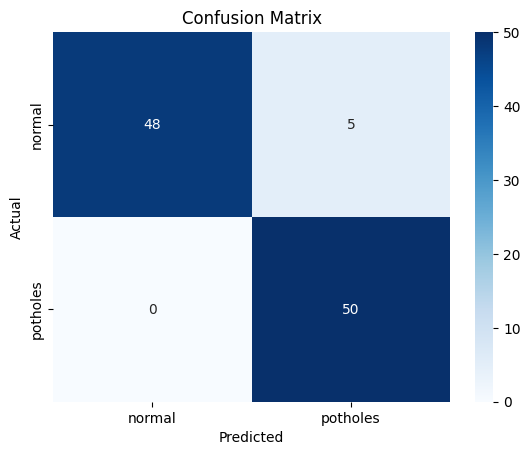

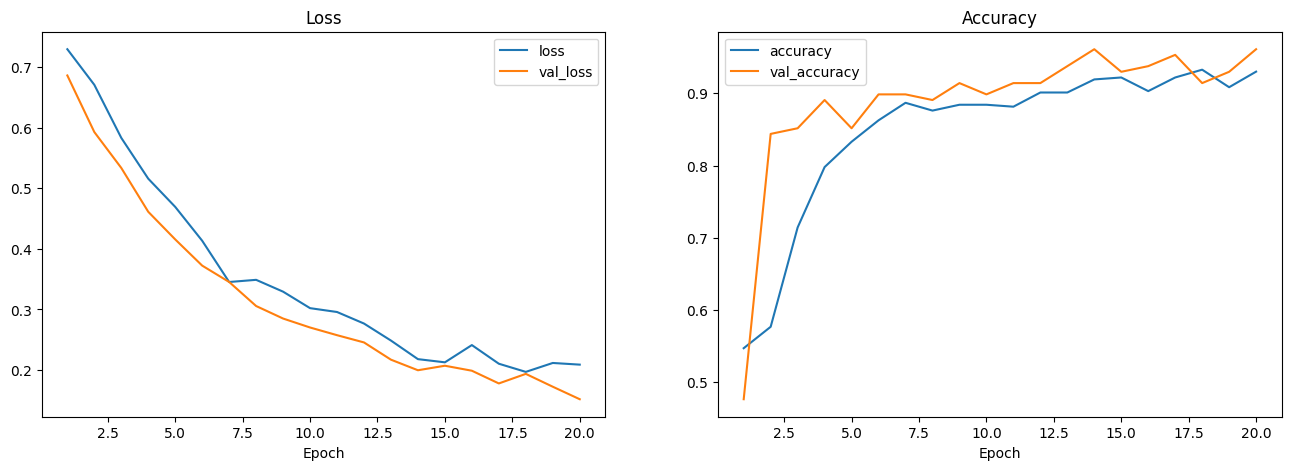


Training MobileNetV2...
Epoch 1/20
6/6 [==============================] - 18s 3s/step - loss: 0.4310 - accuracy: 0.7709 - val_loss: 0.1987 - val_accuracy: 0.9453
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 0.1550 - accuracy: 0.9434 - val_loss: 0.0859 - val_accuracy: 0.9688
Epoch 3/20
6/6 [==============================] - 13s 2s/step - loss: 0.1205 - accuracy: 0.9569 - val_loss: 0.1387 - val_accuracy: 0.9531
Epoch 4/20
6/6 [==============================] - 13s 2s/step - loss: 0.0884 - accuracy: 0.9784 - val_loss: 0.1142 - val_accuracy: 0.9766
Epoch 5/20
6/6 [==============================] - 13s 2s/step - loss: 0.0807 - accuracy: 0.9704 - val_loss: 0.1070 - val_accuracy: 0.9688
Epoch 6/20
6/6 [==============================] - 12s 2s/step - loss: 0.0623 - accuracy: 0.9838 - val_loss: 0.1449 - val_accuracy: 0.9453
Epoch 7/20
6/6 [==============================] - 13s 2s/step - loss: 0.0716 - accuracy: 0.9704 - val_loss: 0.1588 - val_accuracy: 0.9531
Epoch 8/2

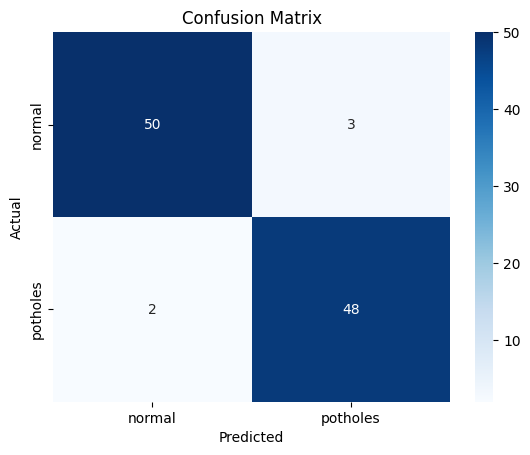

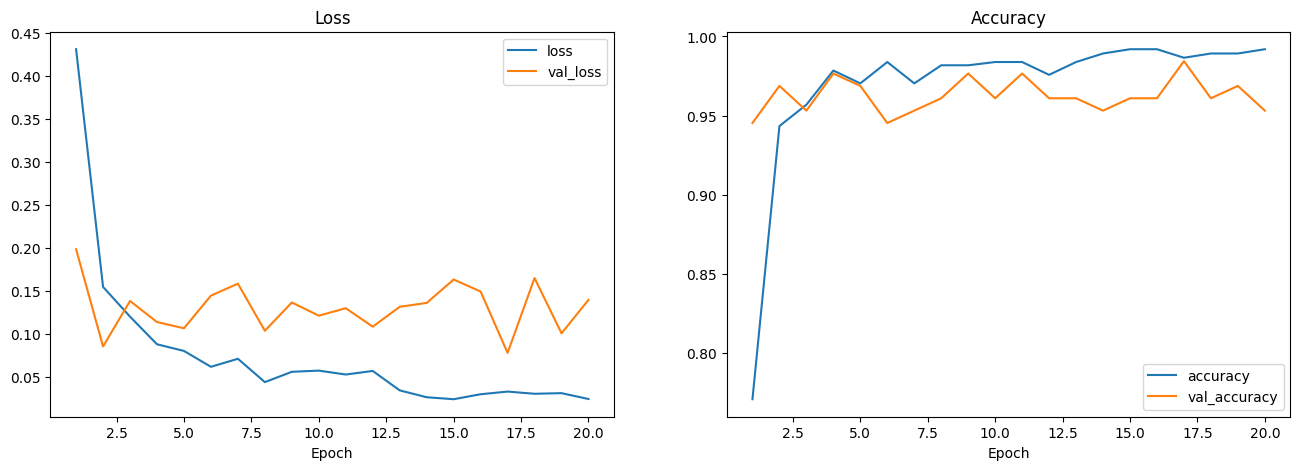

CPU times: user 1h 29min 25s, sys: 39.5 s, total: 1h 30min 4s
Wall time: 13min 38s


In [30]:
%%time

# Model training

# Set empty dict for storing result
histories = {}
results = {}
trained_model = {}


#Looping model training each pre-trained model
epoch = 20
for name, model_class in models.items():
    print(f"\nTraining {name}...")
    model = build_model(model_class)
    history = model.fit(train_set,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=val_set,
                        validation_steps=validation_steps,
                        epochs=epoch,
                        verbose=1)
    histories[name] = history
    trained_model[name] = model

    # Get predicted probabilities
    pred_probs = model.predict(test_set)
    # Convert to class labels
    pred_labels = (pred_probs > 0.5).astype(int).reshape(-1)

    true_labels = test_set.classes

    # Classification report
    cr = classification_report(true_labels, pred_labels, target_names=test_set.class_indices.keys())
    print(f"Classification report for {name}")
    print(cr)

    # Confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot training results
    fig, ax = plt.subplots(ncols=2,figsize=(16,5))
    ax[0].plot(range(1, epoch+1), history.history['loss'], label='loss')
    ax[0].plot(range(1, epoch+1), history.history['val_loss'], label='val_loss')
    ax[0].set_title('Loss')
    ax[0].legend()
    ax[0].set_xlabel('Epoch')
    #ax[0].set_ylim(0,0.01)

    ax[1].plot(range(1, epoch+1), history.history['accuracy'], label='accuracy')
    ax[1].plot(range(1, epoch+1), history.history['val_accuracy'], label='val_accuracy')
    ax[1].set_title('Accuracy')
    ax[1].legend()
    ax[1].set_xlabel('Epoch')
    #ax[1].set_ylim(0.5,1.5)

    plt.show()

    # Store results
    results[name] = {
        'accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'confusion_matrix': cm,
        'classification_report': cr
    }


# vii.3 Model evaluation

## vii.3.1 Model trained using VGG16 as pre-trained model

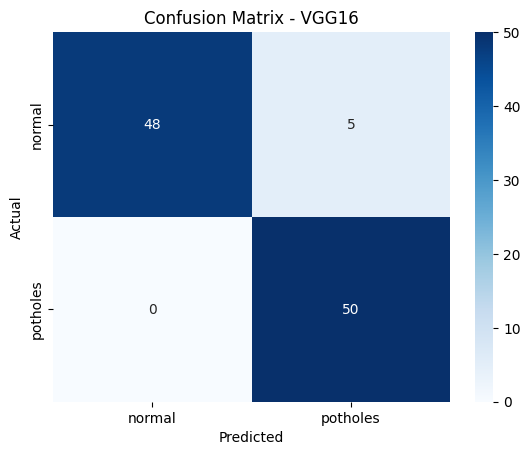

In [31]:
# Get confusion matrix result
vgg16_cm = results['VGG16']['confusion_matrix']

# Plot confusion matrix
sns.heatmap(vgg16_cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VGG16')
plt.show()


In [32]:
#Show classification report
print(results['VGG16']['classification_report'])

              precision    recall  f1-score   support

      normal       1.00      0.91      0.95        53
    potholes       0.91      1.00      0.95        50

    accuracy                           0.95       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.96      0.95      0.95       103



Hasil confusion matrix model yg di training pakai pre-trained model VGG16 menghasilkan hasil prediksi yg sangat baik. Model dapat memprediksi gambar jalan berlubang lebih baik ketimbang memprediksi gambar jalan normal. Dengan akurasi di angka diatas 0.9, model dapat dikatakan good fit dengan beberapa false dan model dapat memberikan hasil yg lebih baik ketimbang model sebelumnya.

Text(0.5, 0, 'Epoch')

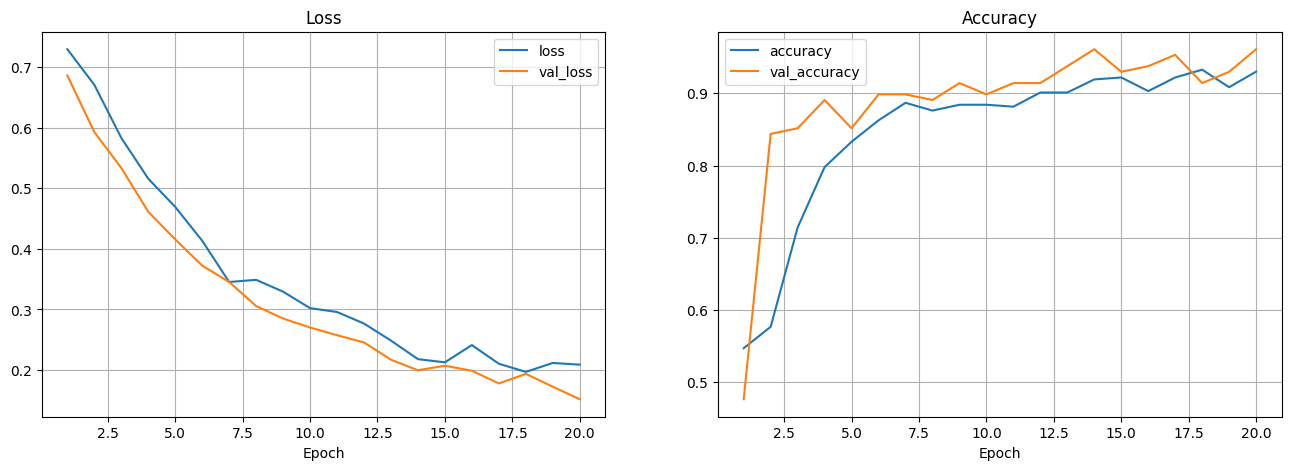

In [33]:
# Plot training results
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1, epoch+1), histories['VGG16'].history['loss'], label='loss')
ax[0].plot(range(1, epoch+1), histories['VGG16'].history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1, epoch+1), histories['VGG16'].history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch+1), histories['VGG16'].history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

Hasil plot loss didapatkan hasil yg cukup baik untuk train dan validation. Keduanya menunjukkan pergerakan menurun yg mulus dari awal sampai mendekati akhir dan hanya terjadi fluktuatif di bagian akhir. Kedua garis train dan validation saling bergerak menurun bersama. Di plot akurasi, garis train menunjukkan pergerakan yg meningkat dari awal sampai akhir. Sedangkan garis validation, menunjukkan peningkatan di awal lalu terjadi beberapa fluktuasi tetapi garis masih mendekati garis train. Hasil kedua plot loss dan akurasi menunjukkan bahwa model efektif memprediksi gambar yg benar.

# vii.3.2 Model trained using MobileNetv2 as pre-trained model

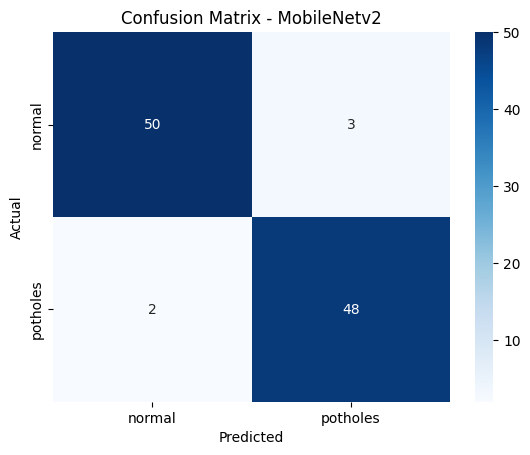

In [34]:
# Get confusion matrix result
mobilenetv2_cm = results['MobileNetV2']['confusion_matrix']

# Plot confusion matrix
sns.heatmap(mobilenetv2_cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MobileNetv2')
plt.show()


In [35]:
# Show classification report
print(results['MobileNetV2']['classification_report'])

              precision    recall  f1-score   support

      normal       0.96      0.94      0.95        53
    potholes       0.94      0.96      0.95        50

    accuracy                           0.95       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.95      0.95      0.95       103



Hasil confusion matrix didapatkan model dapat memprediksi gambar jalan berlubang dan gambar normal dengan baik, tetapi terdapat beberapa false-alarm di prediksi kedua gambar. Model dari segi akurasi cukup baik dengan akurasi diatas 0.9 yg meng konfirmasi model adalah good-fit.

Text(0.5, 0, 'Epoch')

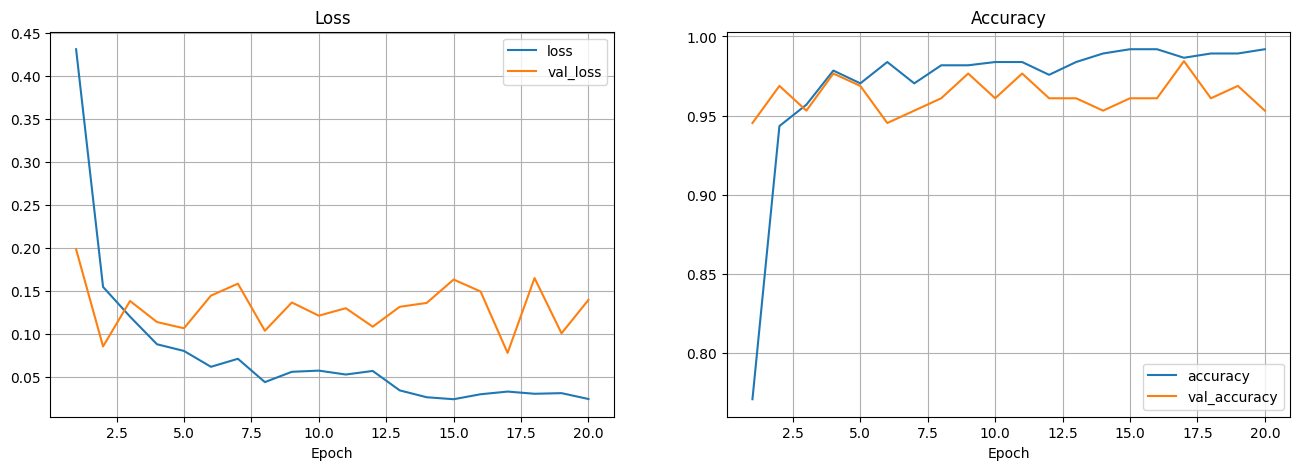

In [36]:
# Plot training results
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1, epoch+1), histories['MobileNetV2'].history['loss'], label='loss')
ax[0].plot(range(1, epoch+1), histories['MobileNetV2'].history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1, epoch+1), histories['MobileNetV2'].history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch+1), histories['MobileNetV2'].history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

Dari hasil plot loss menunjukkan garis train menurun tajam di awal lalu berubah sedikit fluktuatif di epoch di atas 10 dan menjadi sangat rendah dibawah 0.1. Garis validation kurang stabil dan terjadi fluktuasi di epoch di atas 7.5. Dari sini bisa ditarik model cenderung overfitting. Dari plot akurasi, garis train meningkat tajam di awal lalu menjadi cukup stabil. Garis Validation fluktuatif dan terjadi gap antar garis nya. Model MobileNetV2 training cepat dengan performa lumayan. Walau begitu, model cenderung overfit untuk dataset kali ini.

# viii. Model saving

Hasil model training dengan kedua pre-trained model menunjukkan hasil yg lebih baik dibanding base model awal. Dengan akurasi diatas 0.9 dan kedua model dapat memprediksi gambar dengan benar serta plot history yg cukup baik. Disini saya akan mengambil model dengan pre-trained VGG16 sebagai model terbaik, karena melihat dari evaluasi model good-fit dan cenderung stabil dari model lain.

In [37]:
# Save the model
best_model = trained_model['VGG16']
best_model.save('best_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# ix. Model inference

Setelah dilakukan model training, akan dicoba prediksi menggunakan data diluar dataset yg dilakukan di notebook lain.

[Open notebook](https://colab.research.google.com/drive/1Vf7HN3j5PD-4ln5VHsZZ3h992UnGKbEf?usp=sharing)

# x. Kesimpulan

Dalam proyek ini, berhasil dilakukan training model deteksi jalan berlubang berdasarkan gambar menggunakan pendekatan Transfer Learning dengan beberapa arsitektur pre-trained, yaitu VGG16 dan MobileNetV2. Setiap model dievaluasi berdasarkan akurasi, loss, confusion matrix, dan stabilitas performa selama proses training.

Berdasarkan hasil evaluasi, model VGG16 dipilih sebagai model terbaik karena memberikan akurasi tinggi dan stabilitas pada training. Hal ini ditunjukkan oleh:

- Akurasi validasi yang konsisten tinggi (~95%)
- Loss training dan validasi yang stabil dan menurun
- Hasil confusion matrix menunjukkan kinerja klasifikasi yang baik terhadap kedua kelas (normal dan berlubang)

`Kaitan Model dengan Domain Bisnis`         
- Kebutuhan bisnis di pothole detection adalah mengidentifikasi jalan berlubang secara akurat dan cepat dari foto jalan.
- VGG16 sangat kuat dalam menangkap detail visual seperti tekstur kasar, yang memang menjadi salah satu indikator adanya lubang jalan.
- Karena itu, fitur yang dipelajari VGG16 sangat relevan dengan pola nyata di jalan, sehingga model ini cukup baik untuk tahap proof of concept (POC).

`Dampak Jika Model Diterapkan di Dunia Nyata`       
Kelebihan:
- Deteksi lubang bisa dilakukan otomatis tanpa inspeksi manual.
- Membantu perusahaan konstruksi, pemerintah, atau startup smart city menghemat biaya survei.
- Bisa mempercepat pengambilan keputusan untuk perbaikan jalan.

Kekurangan:
- Ukuran VGG16 besar (138 juta parameter) → model cukup berat, memerlukan resource tinggi (CPU/GPU yang kuat untuk inferensi cepat).
- Waktu loading lambat di device atau mobile jika tanpa optimasi.
- Jika dataset di lapangan jauh berbeda (misal pencahayaan buruk, kondisi jalan berbeda), bisa muncul penurunan akurasi (data drift).
- Salah klasifikasi pada gambar ambigu (seperti bayangan, bercak air) → menyebabkan potensi false positive (salah mendeteksi lubang padahal tidak ada).

`Risiko Bisnis Jika Model Ini Diterapkan`
- Overhead biaya: Perlu server lebih mahal untuk jalankan model skala besar.
- Respons lambat: Kalau inferensi lambat, pengguna aplikasi (misal pekerja lapangan) bisa merasa frustasi.
- Kehilangan kepercayaan pengguna: Salah deteksi berulang (terutama false positive) bisa membuat pengguna tidak percaya hasil model.
- Maintenance cost: Model perlu retraining berkala karena kondisi jalan berubah terus (data drift).


`Saran` :       
Untuk deploy skala besar atau mobile apps, sebaiknya:
- Gunakan model lightweight lain (seperti EfficientNetB0) untuk production.
- Quantization atau model pruning → untuk memperkecil ukuran model dan mempercepat inferensi.
- Continuous model evaluation: siapkan pipeline untuk monitoring performa model secara real-time.
- Augmentasi data lebih lanjut: tambahkan contoh-contoh ekstrem (jalan becek, cahaya redup, kabut) agar model lebih tahan berbagai kondisi.
- Ensemble kecil (optional): kombinasikan prediksi dari beberapa lightweight model untuk meningkatkan akurasi stabil.